In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data=xr.open_dataset('../cloud3D_image.nc')

In [3]:
data

<xarray.Dataset>
Dimensions:            (i: 500, j: 500, x: 3, y: 500, z: 500)
Dimensions without coordinates: i, j, x, y, z
Data variables:
    band_0             (i, j) int32 ...
    nb_views           (i, j) int32 ...
    nodata             (i, j) int32 ...
    radius             (i, j) float32 ...
    secondary_1        (i, j) int32 ...
    secondary_2        (i, j) int32 ...
    dir_view_1_vector  (x, y, z) int32 ...
    dir_view_1_origin  (x, y, z) int32 ...
    dir_view_2_vector  (x, y, z) int32 ...
    dir_view_2_origin  (x, y, z) int32 ...
    dir_view_3_vector  (x, y, z) int32 ...
    dir_view_3_origin  (x, y, z) int32 ...
    coord_ECEF         (x, y, z) float64 ...

In [5]:
band_0=data.band_0.to_pandas()
nb_views=data.nb_views.to_pandas()
nodata=data.nodata.to_pandas()
radius=data.radius.to_pandas()
secondary_1=data.secondary_1.to_pandas()
secondary_2=data.secondary_2.to_pandas()

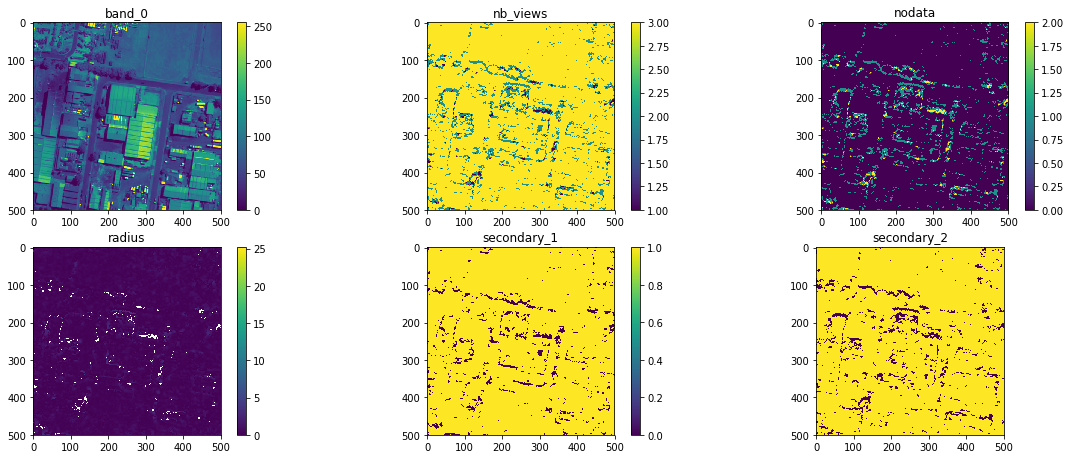

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(5,3,1)
plt.title('band_0')
plt.imshow(band_0)
plt.colorbar()
plt.subplot(5,3,2)
plt.title('nb_views')
plt.imshow(nb_views)
plt.colorbar()
plt.subplot(5,3,3)
plt.title('nodata')
plt.imshow(nodata)
plt.colorbar()
plt.subplot(5,3,4)
plt.title('radius')
plt.imshow(radius)
plt.colorbar()
plt.subplot(5,3,5)
plt.title('secondary_1')
plt.imshow(secondary_1)
plt.colorbar()
plt.subplot(5,3,6)
plt.title('secondary_2')
plt.imshow(secondary_2)
plt.show()


On the graph "nb_views", we can see that there is some blanks in the data. The number of views given by this plot goes from 1 to 3 for the total 3 pictures we have to reconstruct a 3 dimensional cloud. If we have 3 views (yellow on the plot), there is good resolution. When there is two pictures (light blue), we can still build the third dimension. However when there is only one picture, the triangulation with s2p is impossible to be made. We have then blanks in our data. To visualise the 3 dimensional clouds we take care to avoid those points. We could also fill in the points by making operations on the neighbourood of those positions.

In [9]:
x=np.array(data.coord_ECEF[0]).flatten()
y=np.array(data.coord_ECEF[1]).flatten()
z=np.array(data.coord_ECEF[2]).flatten()
c=np.array(band_0).flatten()

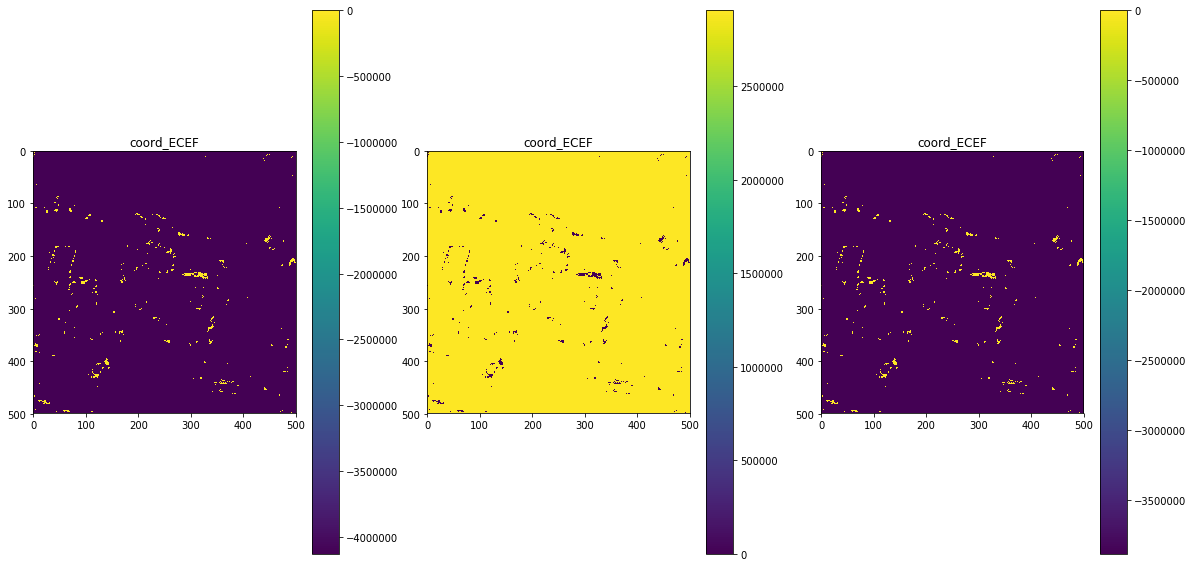

In [20]:
fig=plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title('coord_ECEF')
plt.imshow(data.coord_ECEF[0])
plt.colorbar()
plt.subplot(1,3,2)
plt.title('coord_ECEF')
plt.imshow(data.coord_ECEF[1])
plt.colorbar()
plt.subplot(1,3,3)
plt.title('coord_ECEF')
plt.imshow(data.coord_ECEF[2])
plt.colorbar()
plt.show()

In [13]:
c

array([110, 107,  99, ...,  36,  34,  35], dtype=int32)

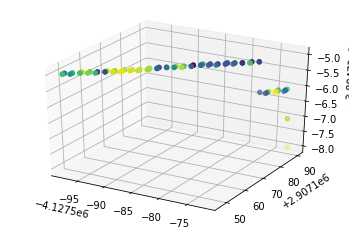

In [15]:
N=100
isample=np.random.randint(0,len(x),)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
xs,ys,zs,cs=[xj for xj in x[:N] if xj!=0],[yj for yj in y[:N] if yj!=0],[zj for zj in z[:N] if zj!=0],c[:N]
ax.scatter(xs,ys,zs,c=cs,cmap='viridis')
plt.show()

In [1]:
coord_ECEF

NameError: name 'coord_ECEF' is not defined